# TWO-ARMED BANDIT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#return 0: explore
#return 1: exploit
def get_policy(epsilon):
  rnd = np.random.uniform(0, 1)
  #print(rnd)
  if (rnd < epsilon):
    return 0
  else:
    return 1

In [ ]:
#generate random number uniformly between 0 and 1
#return 0 means action 1
#return 1 means action 2
def get_random_action():
  rnd = np.random.uniform(0, 1)
  #print(rnd)
  if (rnd <= 0.5):
    return 0
  else:
    return 1

In [ ]:
def estimate_newq(q, lr, reward):
  newq = q + (lr * (reward - q))

  return newq

In [ ]:
def get_reward(idx):
  if (idx==0):
    #action 1
    return np.random.normal(5, np.sqrt(10))
  else:
    #action 2
    rnd = np.random.uniform(0, 1)
    if (rnd <= 0.5):
      return np.random.normal(10, np.sqrt(15))
    else:
      return np.random.normal(4, np.sqrt(10))
    

In [ ]:
def get_learning_rate(lr_id, step=0):
  if lr_id==1:
    return 1
  elif lr_id==2:
    return pow(0.9, step)
  elif lr_id==3:
    return 1/(1+(np.log(1+step)))
  elif lr_id==4:
    return 1/step
  elif lr_id==5:
    return 0.1
  else:
    return 0

In [ ]:
def run(epsilon, lr_id, qa1=0, qa2=0):

  r_value_indep_acc = 0
  q_value_indep_acc = 0

  for indep_run in range (1, 101):
    q_value = [qa1, qa2]  #current q value
    r_value = 0
    r_value_acc = [0]

    #1000 time step
    for step in range(1, 1001):
      #check e-greedy policy
      policy = get_policy(epsilon)

      if (policy==1):
        #exploit
        #print('exploit')
        #check argmax q_value
        id = np.argmax(q_value)
      else:
        #explore
        #print('explore')
        #action i
        id = get_random_action()
      
      #print('execute action {}'.format(id+1))
      learning_rate = get_learning_rate(lr_id, step)
      r = get_reward(id)
      q_value[id] = estimate_newq(q_value[id], learning_rate, r)
     
      
      r_value += r
      r_value_acc.append(r_value/step)
      #accumulate_reward(r, step)

    
      #print(q_value[id])
    if indep_run == 1:
      r_value_indep_acc = r_value_acc
      q_value_indep_acc = q_value
    else:
      r_value_indep_acc = np.row_stack((r_value_indep_acc, r_value_acc))
      q_value_indep_acc = np.row_stack((q_value_indep_acc, q_value))
 # print(q_value_indep_acc)
  
  r_value_indep_avg = np.mean(r_value_indep_acc, axis=0)
  q_value_indep_avg = np.mean(q_value_indep_acc, axis=0)

  return r_value_indep_avg, q_value_indep_avg

### PART A

Learning rate: 1
Epsilon: 0
Q(a1): 0.1950686271747241, Q(a2): 0.23961329777694013, Acc R Avg: 5.933442402074166


Epsilon: 0.1
Q(a1): 2.008267996805257, Q(a2): 3.514667589874516, Acc R Avg: 5.97721858438981


Epsilon: 0.2
Q(a1): 3.415219732390575, Q(a2): 4.126690320834877, Acc R Avg: 6.0439923715861275


Epsilon: 0.5
Q(a1): 3.931305771892111, Q(a2): 5.899947677185618, Acc R Avg: 6.062247101745122




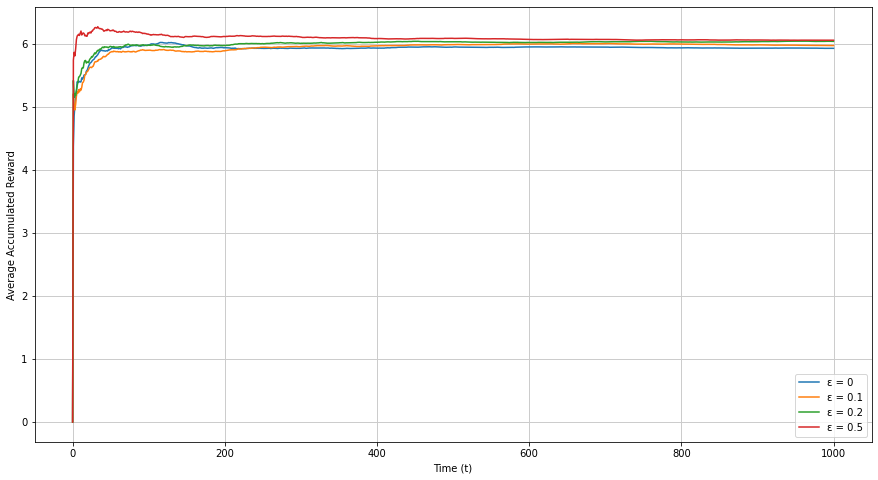

Learning rate: 0.9^k
Epsilon: 0
Q(a1): 4.316158008533711, Q(a2): 0.7964800609577292, Acc R Avg: 5.233843106658208


Epsilon: 0.1
Q(a1): 4.071828906444199, Q(a2): 3.580011105318551, Acc R Avg: 5.764896213030545


Epsilon: 0.2
Q(a1): 3.9566616534080437, Q(a2): 4.367899913336459, Acc R Avg: 5.940259167026852


Epsilon: 0.5
Q(a1): 4.675239837383699, Q(a2): 6.519225132964014, Acc R Avg: 6.329690185642741




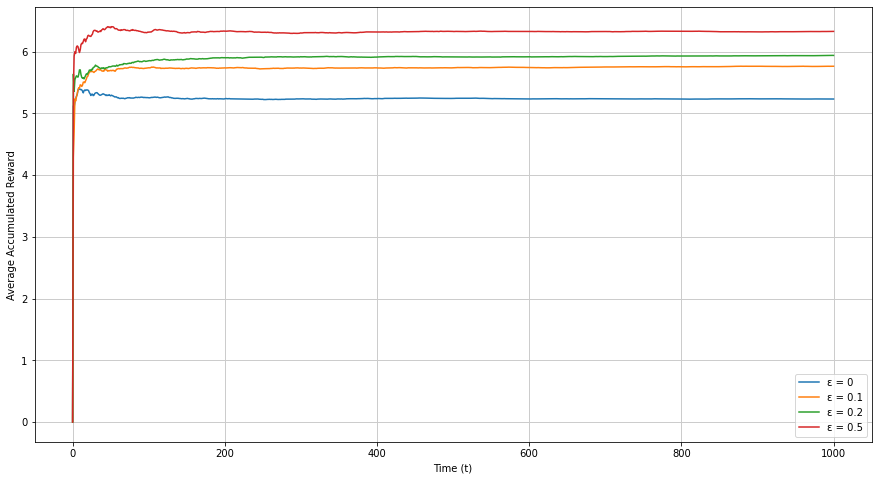

Learning rate: 1/(1+Ln(1+k))
Epsilon: 0
Q(a1): 4.8347761019497435, Q(a2): 0.29034464577560937, Acc R Avg: 5.105744705740385


Epsilon: 0.1
Q(a1): 4.597755878083716, Q(a2): 6.734914673233387, Acc R Avg: 6.575813470828993


Epsilon: 0.2
Q(a1): 4.670413938215748, Q(a2): 6.792171296588627, Acc R Avg: 6.5536177667617075


Epsilon: 0.5
Q(a1): 4.866040768693443, Q(a2): 6.615203383549277, Acc R Avg: 6.331183452482381




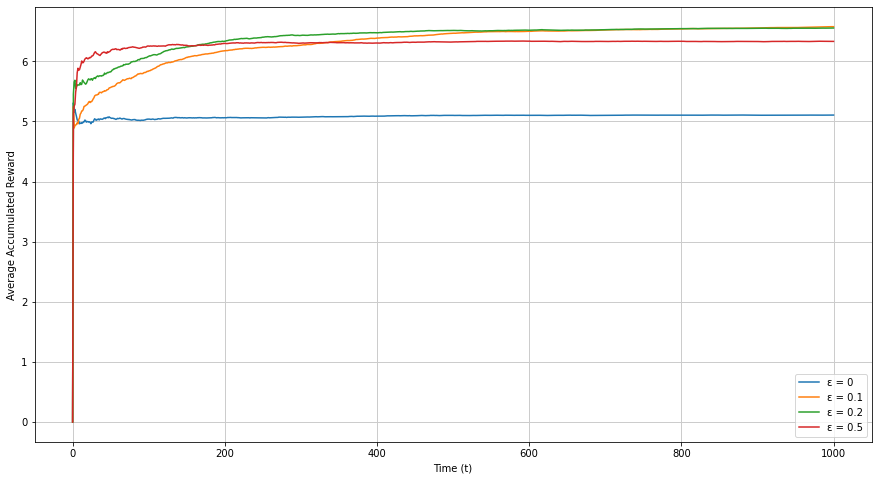

Learning rate: 1/k
Epsilon: 0
Q(a1): 4.787294298557826, Q(a2): 0.20705697558593766, Acc R Avg: 5.052724365954332


Epsilon: 0.1
Q(a1): 4.421276895347298, Q(a2): 2.565813778243158, Acc R Avg: 5.392553806871404


Epsilon: 0.2
Q(a1): 4.615108247245397, Q(a2): 3.9071554786636535, Acc R Avg: 5.521231467417167


Epsilon: 0.5
Q(a1): 4.6106287044599386, Q(a2): 6.350591997459958, Acc R Avg: 6.2249651659344964




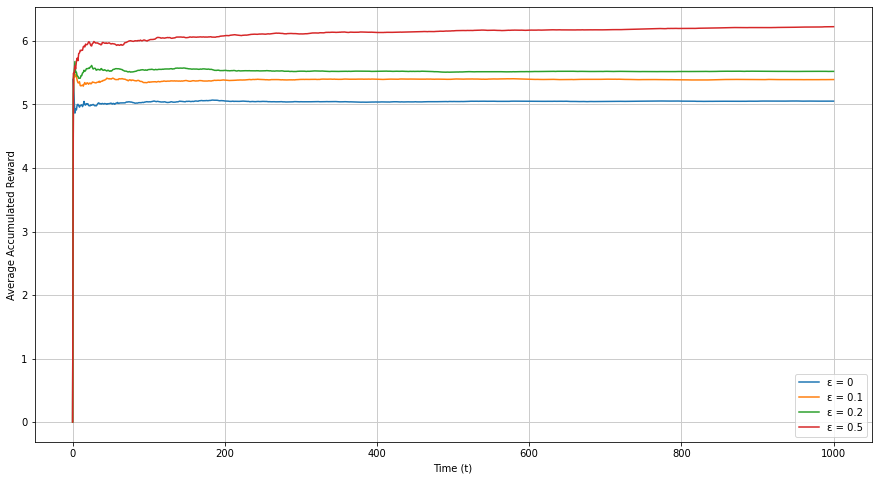

In [ ]:
# PART A
eps_setting = [0, 0.1, 0.2, 0.5]
lr_setting = [1, 2, 3, 4]

for l in lr_setting:
  if l==1:
    print("Learning rate: 1")
  elif l==2:
    print("Learning rate: 0.9^k")
  elif l==3:
    print("Learning rate: 1/(1+Ln(1+k))")
  elif l==4:
    print("Learning rate: 1/k")
  
  for e in eps_setting:
    r_avg, q_avg = run(e, l)
    print("Epsilon: {}".format(e))
    print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
    print("\n")
    plt.plot(r_avg, label='\u03B5 = {}'.format(e))

  plt.rcParams["figure.figsize"] = (15,8)
  plt.ylabel('Average Accumulated Reward')
  plt.xlabel('Time (t)')
  plt.grid(color='0.8', linestyle='-', linewidth=1)
  plt.legend()
  
  # show plot
  plt.show()

### PART B

Epsilon: 0.1
Q(a1): 4.468210479887755, Q(a2): 6.945738197320001, Acc R Avg: 6.4974502620055405


Epsilon: 0.1
Q(a1): 4.57754222172327, Q(a2): 6.8181833727073675, Acc R Avg: 6.723786502536916


Epsilon: 0.1
Q(a1): 4.605981212741806, Q(a2): 6.839644072682319, Acc R Avg: 6.680732490009697




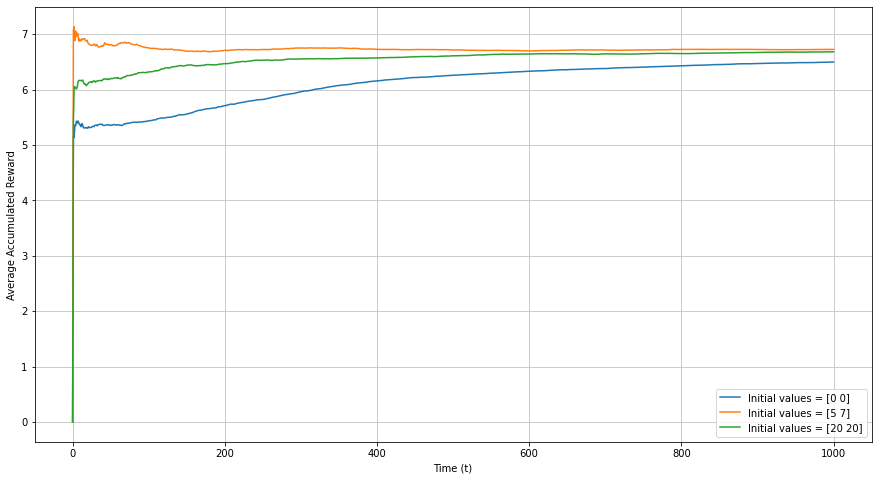

<Figure size 640x640 with 0 Axes>

In [ ]:
# PART B
opt_init_values = [[0, 0], [5, 7], [20, 20]]
e = 0.1
l = 5 #l = 5 means 0.1 in get_learning_rate() function

for inval in opt_init_values:
  r_avg, q_avg = run(e, l, inval[0], inval[1])
  print("Epsilon: {}".format(e))
  print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
  print("\n")
  plt.plot(r_avg, label='Initial values = [{} {}]'.format(inval[0], inval[1]))

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Time (t)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend()
plt.figure(figsize=(640/72, 640/72), dpi=72)
plt.show()

### PART C DEFINITION


In [ ]:
# calculate probability of each action
def get_gb_policy(ha1, ha2):
  prob1 = np.exp(ha1)/(np.exp(ha1)+np.exp(ha2))
  prob2 = np.exp(ha2)/(np.exp(ha1)+np.exp(ha2))

  return [prob1, prob2]

In [ ]:
#get selected action based on probability on action 1
#return 0 means action 1
#return 1 means action 2
def get_gb_action(prob1):
  rnd = np.random.uniform(0, 1)
  #print(rnd)
  if (rnd < prob1):
    return 0
  else:
    return 1

In [ ]:
#get newh
def estimate_newh(oldh, lr, r1, r1_avg, prob, selected=False):
  
  #print("==========")
  #print("oldh: {}".format(oldh))
  #print("lr: {}".format(lr))
  #print("r1: {}".format(r1))
  #print("r_avg: {}".format(r1_avg))
  #print("prob: {}".format(prob))
  

  if (selected==True):
    newh = oldh + (lr*(r1-r1_avg)*(1-prob))
  else:
    newh = oldh - (lr*(r1-r1_avg)*prob)
  
  #print("newh: {}".format(newh))
  #print("\n")
  return newh

In [ ]:
def run_gb(lr, ha1=0, ha2=0):

  r_value_indep_acc = 0
  h_value_indep_acc = 0

  for indep_run in range (1, 101):
    h_value = [ha1, ha2]  #current h value
    r_value = 0
    r_value_acc = [0]

    #1000 time step
    for step in range(1, 1001):
      #get policy probability
      policy = get_gb_policy(h_value[0], h_value[1])

      #get selected action
      selected_action = get_gb_action(policy[0])

      #calculate reward
      r = get_reward(selected_action)
      r_value += r
      r_value_acc.append(r_value/step)  #r1 avg

      #get selected action
      if (selected_action==0):
        #action 1 is selected
        #calculate new H(a1)
        h_value[0] = estimate_newh(h_value[0], lr, r, r_value_acc[step], policy[0], True)
        #calculate new H(a2)
        h_value[1] = estimate_newh(h_value[1], lr, r, r_value_acc[step], policy[1])
      else:
        #action 2 is selected
        #calculate new H(a2)
        h_value[1] = estimate_newh(h_value[1], lr, r, r_value_acc[step], policy[1], True)
        #calculate new H(a1)
        h_value[0] = estimate_newh(h_value[0], lr, r, r_value_acc[step], policy[0])

    if indep_run == 1:
      r_value_indep_acc = r_value_acc
      h_value_indep_acc = h_value
    else:
      r_value_indep_acc = np.row_stack((r_value_indep_acc, r_value_acc))
      h_value_indep_acc = np.row_stack((h_value_indep_acc, h_value))

  #print(h_value_indep_acc)
 
  r_value_indep_avg = np.mean(r_value_indep_acc, axis=0)
  h_value_indep_avg = np.mean(h_value_indep_acc, axis=0)

  return r_value_indep_avg, h_value_indep_avg

### PART C

Learning rate: 0.1
H(a1): -3.1393490282102863, H(a2): 3.139349028210288, Acc R Avg: 6.931517919905839


Epsilon: 0.1
Q(a1): 4.605174128653789, Q(a2): 6.694944942366792, Acc R Avg: 6.497265180233115




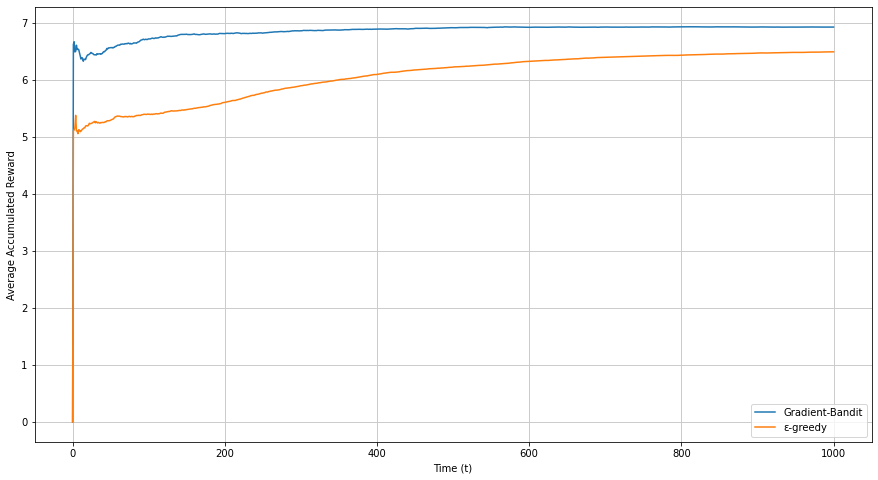

<Figure size 640x640 with 0 Axes>

In [ ]:
# PART C

#Gradient-Bandit
lr = 0.1
ha = [0, 0]
r_avg, h_avg = run_gb(lr, ha[0], ha[1])
print("Learning rate: {}".format(lr))
print("H(a1): {}, H(a2): {}, Acc R Avg: {}".format(h_avg[0], h_avg[1], r_avg[1000]))
print("\n")
plt.plot(r_avg, label='Gradient-Bandit')

#E-Greedy
e = 0.1
l = 5 #l = 5 means 0.1 in get_learning_rate() function
r_avg, q_avg = run(e, l, 0, 0)
print("Epsilon: {}".format(e))
print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
print("\n")
plt.plot(r_avg, label='\u03B5-greedy')

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Time (t)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend()
plt.figure(figsize=(640/72, 640/72), dpi=72)
plt.show()

In [ ]:
val = [0, 1, 9]
val2 = [3, 4, 5]
x = np.row_stack((val, val2))

#np.mean(x, axis=0)
x

array([[0, 1, 9],
       [3, 4, 5]])

### EXTRAS



Learning rate: 1
Epsilon: 0
Q(a1): 0.3296654761266008, Q(a2): 0.01049785921209633, Acc R Avg: 5.93259713739474


Epsilon: 0.1
Q(a1): 2.878179021933084, Q(a2): 3.677065255316811, Acc R Avg: 6.012914300533984


Epsilon: 0.2
Q(a1): 2.722567270717568, Q(a2): 4.9857608290864395, Acc R Avg: 6.08457864530098


Epsilon: 0.5
Q(a1): 4.221399239292645, Q(a2): 5.905487986326955, Acc R Avg: 6.085882338198521




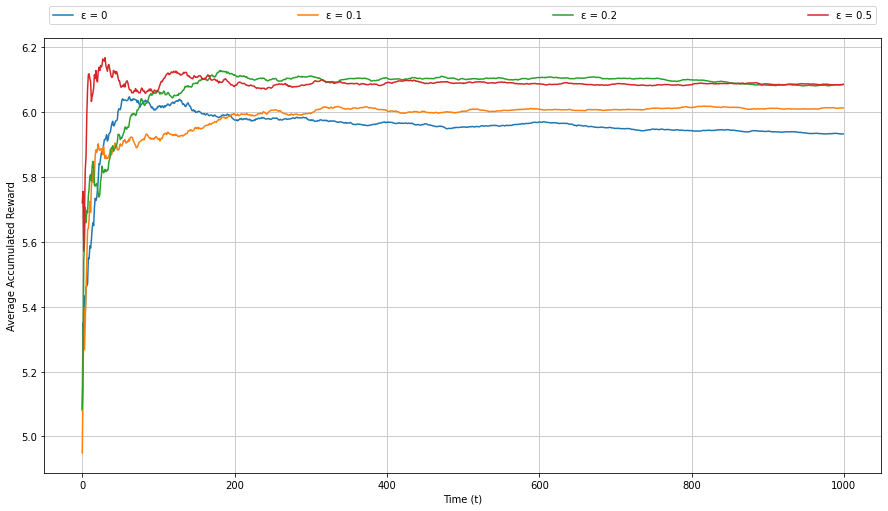



Learning rate: 0.9^k
Epsilon: 0
Q(a1): 4.107107622926133, Q(a2): 1.0918117242067835, Acc R Avg: 5.337512336367463


Epsilon: 0.1
Q(a1): 4.03270483743902, Q(a2): 2.7477995790766094, Acc R Avg: 5.592600490907867


Epsilon: 0.2
Q(a1): 4.08813442651129, Q(a2): 4.42634261840916, Acc R Avg: 5.976540485323841


Epsilon: 0.5
Q(a1): 4.5630574039321665, Q(a2): 6.234513605669667, Acc R Avg: 6.240755204857355




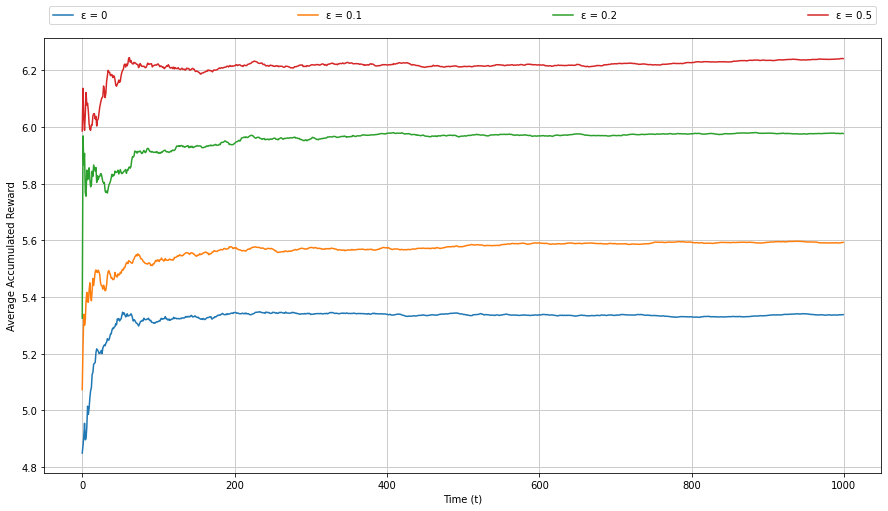



Learning rate: 1/(1+Ln(1+k))
Epsilon: 0
Q(a1): 4.32987028537713, Q(a2): 0.6891561938449509, Acc R Avg: 5.206813554903425


Epsilon: 0.1
Q(a1): 4.526846526597559, Q(a2): 6.980368393563701, Acc R Avg: 6.562183242330894


Epsilon: 0.2
Q(a1): 4.496380148830919, Q(a2): 6.770959403381124, Acc R Avg: 6.570242404847238


Epsilon: 0.5
Q(a1): 4.8121422237736, Q(a2): 6.717770907593507, Acc R Avg: 6.362954884432075




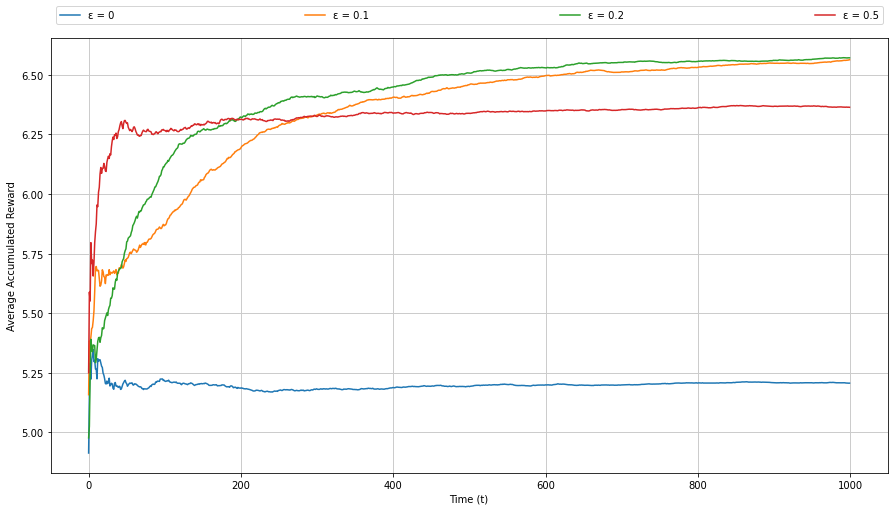



Learning rate: 1/k
Epsilon: 0
Q(a1): 4.718116284089002, Q(a2): 0.34908070625158516, Acc R Avg: 5.099087846709823


Epsilon: 0.1
Q(a1): 4.39450839758898, Q(a2): 2.6691092686175732, Acc R Avg: 5.393984349751574


Epsilon: 0.2
Q(a1): 4.548255193892905, Q(a2): 4.0622644232466065, Acc R Avg: 5.605141284377462


Epsilon: 0.5
Q(a1): 4.614439485614468, Q(a2): 6.485766280299342, Acc R Avg: 6.291273292818626




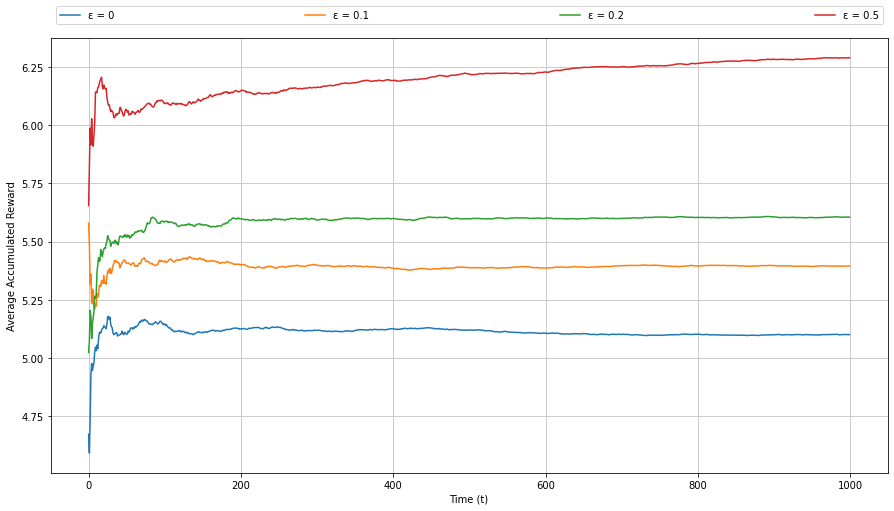

In [ ]:
# PART A
eps_setting = [0, 0.1, 0.2, 0.5]
lr_setting = [1, 2, 3, 4]

for l in lr_setting:
  if l==1:
    print("\n\nLearning rate: 1")
  elif l==2:
    print("\n\nLearning rate: 0.9^k")
  elif l==3:
    print("\n\nLearning rate: 1/(1+Ln(1+k))")
  elif l==4:
    print("\n\nLearning rate: 1/k")
  
  for e in eps_setting:
    r_avg, q_avg = run(e, l)
    print("Epsilon: {}".format(e))
    print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
    print("\n")
    plt.plot(r_avg[1:], label='\u03B5 = {}'.format(e))
    r_avg[1:].shape

  plt.rcParams["figure.figsize"] = (15,8)
  plt.ylabel('Average Accumulated Reward')
  plt.xlabel('Time (t)')
  plt.grid(color='0.8', linestyle='-', linewidth=1)
  plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand")
  
  # show plot
  plt.show()

Epsilon: 0.1
Q(a1): 4.459070031941224, Q(a2): 6.885748570865242, Acc R Avg: 6.524000442642663


Epsilon: 0.1
Q(a1): 4.593716030367198, Q(a2): 6.793852375765738, Acc R Avg: 6.769687540069397


Epsilon: 0.1
Q(a1): 4.546697602509777, Q(a2): 6.9782724390282205, Acc R Avg: 6.723386082934037




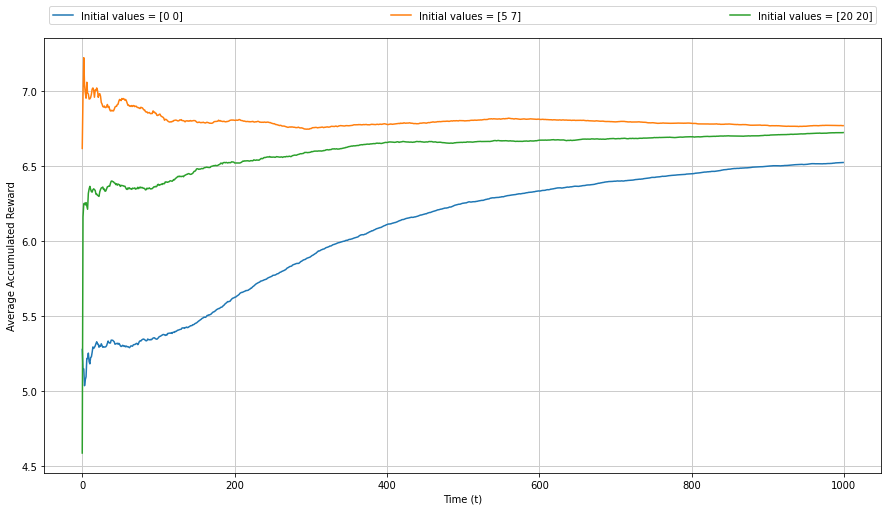

(1000,)

In [ ]:
# PART B
opt_init_values = [[0, 0], [5, 7], [20, 20]]
e = 0.1
l = 5 #l = 5 means 0.1 in get_learning_rate() function

for inval in opt_init_values:
  r_avg, q_avg = run(e, l, inval[0], inval[1])
  print("Epsilon: {}".format(e))
  print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
  print("\n")
  plt.plot(r_avg[1:], label='Initial values = [{} {}]'.format(inval[0], inval[1]))

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Time (t)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=3, mode="expand")
plt.show()

r_avg[1:].shape

Learning rate: 0.1
H(a1): -3.1123404100685024, H(a2): 3.1123404100685033, Acc R Avg: 6.942161767091921


Epsilon: 0.1
Q(a1): 4.6112854711634155, Q(a2): 6.7857500708714715, Acc R Avg: 6.532485827426065




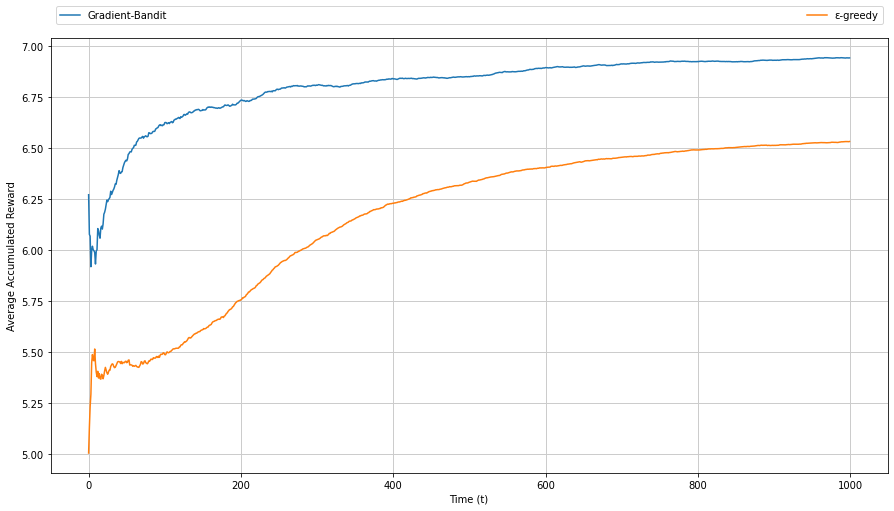

In [ ]:
# PART C

#Gradient-Bandit
lr = 0.1
ha = [0, 0]
r_avg, h_avg = run_gb(lr, ha[0], ha[1])
print("Learning rate: {}".format(lr))
print("H(a1): {}, H(a2): {}, Acc R Avg: {}".format(h_avg[0], h_avg[1], r_avg[1000]))
print("\n")
plt.plot(r_avg[1:], label='Gradient-Bandit')

#E-Greedy
e = 0.1
l = 5 #l = 5 means 0.1 in get_learning_rate() function
r_avg, q_avg = run(e, l, 0, 0)
print("Epsilon: {}".format(e))
print("Q(a1): {}, Q(a2): {}, Acc R Avg: {}".format(q_avg[0], q_avg[1], r_avg[1000]))
print("\n")
plt.plot(r_avg[1:], label='\u03B5-greedy')

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Time (t)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand")
plt.show()



In [ ]:
import numpy as np
1/(1+(np.log(1+1000)))

0.12644215529547434

In [ ]:
pow(0.9, 30)

0.04239115827521624

In [ ]:
1/1000

0.001